In [146]:
# Задание 1.1 Найти машинный нуль
zero = 1.0
while zero * 0.5 != 0:
    zero = zero * 0.5
print("Machine Zero = {val}".format(val = zero))

Machine Zero = 5e-324


In [147]:
# Задание 1.1 Найти машинную бесконечность
first = 1.0
second = 3.0
while 2 * first < 2 * second:
    first = first * 2
    second = second * 2
print("Machine Infinity = {val}".format(val = first))

Machine Infinity = 8.98846567431158e+307


In [148]:
# Задание 1.1 Найти машинное эпсилон
eps = 1.0
while 1 + eps * 0.5 != 1:
    eps = eps * 0.5
print("Machine Epsilon = {val}".format(val = eps))

Machine Epsilon = 2.220446049250313e-16


In [149]:
# Задание 1.2, вариант 12 Исследовать поведение погрешности приближения функции F(x)
# частичными суммами на отрезке [a,b]

# F(x) = (e**x - 1)/x, [a, b] = [-7, -3]
# n-ая частичная сумма S_n(x) = 1 + (x/2!) + (x**2/3!) +...+ (x**n/(n + 1)!)

import math
import numpy
import matplotlib.pyplot as plt

# Изначальная функция
def Function(x):
    return (numpy.exp(x) - 1)/x

# N-ый член формулы Тейлора для функции (отсчёт с 0)
def NMember(x, n):
    return x**n / math.factorial(n + 1)

# Функция вычисления N-ой частичной суммы
def PartialSumN(x, n):
    s_n = 0
    for i in range(0, n):
        s_n = s_n + NMember(x, i)
    return s_n

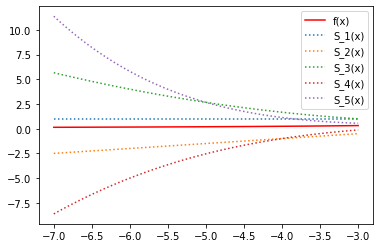

In [150]:
# Графики исходной функции и первых пяти частичных сумм

a = -7
b = -3

x_plot = numpy.linspace(a, b, 100)

plt.plot(x_plot, Function(x_plot), color = 'red', label = 'f(x)')
plt.plot(x_plot, PartialSumN(x_plot, 1), ls = 'dotted', label = 'S_1(x)')
plt.plot(x_plot, PartialSumN(x_plot, 2), ls = 'dotted', label = 'S_2(x)')
plt.plot(x_plot, PartialSumN(x_plot, 3), ls = 'dotted', label = 'S_3(x)')
plt.plot(x_plot, PartialSumN(x_plot, 4), ls = 'dotted', label = 'S_4(x)')
plt.plot(x_plot, PartialSumN(x_plot, 5), ls = 'dotted', label = 'S_5(x)')
plt.legend()

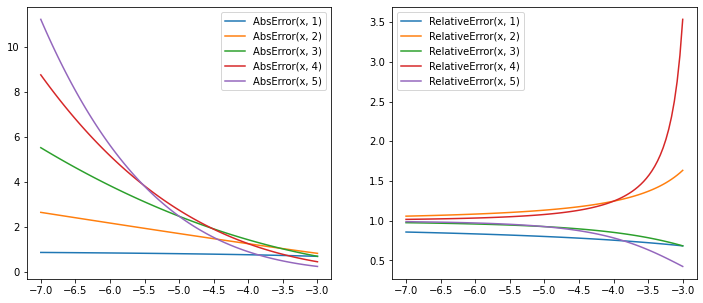

In [151]:
# Функции для погрешностей и
# графики погрешностей для первых пяти частичных сумм
def AbsError(x, n):
    return abs(PartialSumN(x, n) - Function(x))

def RelativeError(x, n):
    return AbsError(x, n)/abs(PartialSumN(x, n))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x_plot, AbsError(x_plot, 1), label = 'AbsError(x, 1)')
axs[0].plot(x_plot, AbsError(x_plot, 2), label = 'AbsError(x, 2)')
axs[0].plot(x_plot, AbsError(x_plot, 3), label = 'AbsError(x, 3)')
axs[0].plot(x_plot, AbsError(x_plot, 4), label = 'AbsError(x, 4)')
axs[0].plot(x_plot, AbsError(x_plot, 5), label = 'AbsError(x, 5)')
axs[0].legend()

axs[1].plot(x_plot, RelativeError(x_plot, 1), label = 'RelativeError(x, 1)')
axs[1].plot(x_plot, RelativeError(x_plot, 2), label = 'RelativeError(x, 2)')
axs[1].plot(x_plot, RelativeError(x_plot, 3), label = 'RelativeError(x, 3)')
axs[1].plot(x_plot, RelativeError(x_plot, 4), label = 'RelativeError(x, 4)')
axs[1].plot(x_plot, RelativeError(x_plot, 5), label = 'RelativeError(x, 5)')
axs[1].legend()

In [152]:
# Определить количество членов ряда NMachineError,
# при котором величина относительной погрешности в
# средней точке отрезка станет меньше машинного эпсилон.
# Величину относительной погрешности вычислять 
# как отношение прибавляемого члена к накопленной частичной
# сумме S(x, N), взятое по модулю.

c = (a + b) / 2
Sum_N = 1
NMachineError = 1
addend = NMember(c, NMachineError)
while abs(addend / Sum_N) >= eps:
    Sum_N = Sum_N + addend
    NMachineError = NMachineError + 1
    addend = NMember(c, NMachineError)
print('Number of members = {val}'.format(val = NMachineError))

Number of members = 35


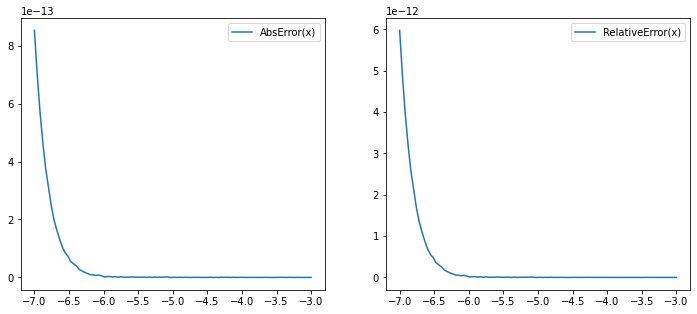

In [153]:
# Графики погрешнойстей для частичной суммы NMachineError

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x_plot, AbsError(x_plot, NMachineError), label = 'AbsError(x)')
axs[0].legend()

axs[1].plot(x_plot, RelativeError(x_plot, NMachineError), label = 'RelativeError(x)')
axs[1].legend()

In [154]:
# Функции для вычисления результатов с округлением

def SumRoundedMember(x, N, t):
    res = 0.
    for i in range(N):
        res = res + round(NMember(x, i), t)
        res = round(res, t)
    return res

def SumRounded(x, N, t):
    res = x.copy()
    for i in range(len(x)):
        res[i] = SumRoundedMember(x[i], N, t)
    return res

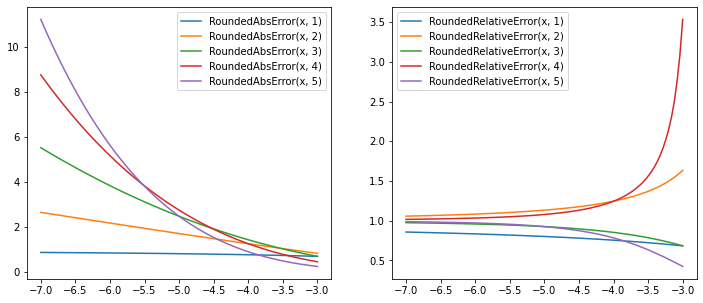

In [156]:
# Графики погрешностей при округлении для пяти первых частичных сумм
constT = 3

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(x_plot, abs(Function(x_plot) - SumRounded(x_plot, 1, constT)), label = 'RoundedAbsError(x, 1)')
axs[0].plot(x_plot, abs(Function(x_plot) - SumRounded(x_plot, 2, constT)), label = 'RoundedAbsError(x, 2)')
axs[0].plot(x_plot, abs(Function(x_plot) - SumRounded(x_plot, 3, constT)), label = 'RoundedAbsError(x, 3)')
axs[0].plot(x_plot, abs(Function(x_plot) - SumRounded(x_plot, 4, constT)), label = 'RoundedAbsError(x, 4)')
axs[0].plot(x_plot, abs(Function(x_plot) - SumRounded(x_plot, 5, constT)), label = 'RoundedAbsError(x, 5)')
axs[0].legend()

axs[1].plot(x_plot, abs((Function(x_plot) -
                    SumRounded(x_plot, 1, constT))/SumRounded(x_plot, 1, constT)), label = 'RoundedRelativeError(x, 1)')
axs[1].plot(x_plot, abs((Function(x_plot) -
                    SumRounded(x_plot, 2, constT))/SumRounded(x_plot, 2, constT)), label = 'RoundedRelativeError(x, 2)')
axs[1].plot(x_plot, abs((Function(x_plot) -
                    SumRounded(x_plot, 3, constT))/SumRounded(x_plot, 3, constT)), label = 'RoundedRelativeError(x, 3)')
axs[1].plot(x_plot, abs((Function(x_plot) -
                    SumRounded(x_plot, 4, constT))/SumRounded(x_plot, 4, constT)), label = 'RoundedRelativeError(x, 4)')
axs[1].plot(x_plot, abs((Function(x_plot) -
                    SumRounded(x_plot, 5, constT))/SumRounded(x_plot, 5, constT)), label = 'RoundedRelativeError(x, 5)')
axs[1].legend()